# Import Pandas

In [1]:
import pandas as pd

## Polynomial Function

In [2]:
def polynomial_DF(feature, degree): # feature is pandas.Series type
    poly_DF = pd.DataFrame()
    poly_DF['power_1']=feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            temp=feature.apply(lambda x:x**power)
            poly_DF[name]=temp
    return poly_DF

In [3]:
tmp=pd.Series([1,2,3])
print(polynomial_DF(tmp,3))

   power_1  power_2  power_3
0        1        1        1
1        2        4        8
2        3        9       27


# Import Data

In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales=pd.read_csv('kc_house_data.csv',dtype=dtype_dict)
sales=sales.sort_values(['sqft_living','price'])
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,1924059029,20140617T000000,4668000.0,5.0,6.75,9640.0,13068,1,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270.0,10454.0
9254,9208900037,20140919T000000,6885000.0,6.0,7.75,9890.0,31374,2,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540.0,42730.0
3914,9808700762,20140611T000000,7062500.0,5.0,4.50,10040.0,37325,2,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930.0,25449.0
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050.0,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940.0,8800.0


In [5]:
poly1=polynomial_DF(sales['sqft_living'],1)
poly1['price']=sales['price']
poly1

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0
...,...,...
8092,9640.0,4668000.0
9254,9890.0,6885000.0
3914,10040.0,7062500.0
7252,12050.0,7700000.0


## Exploring Data

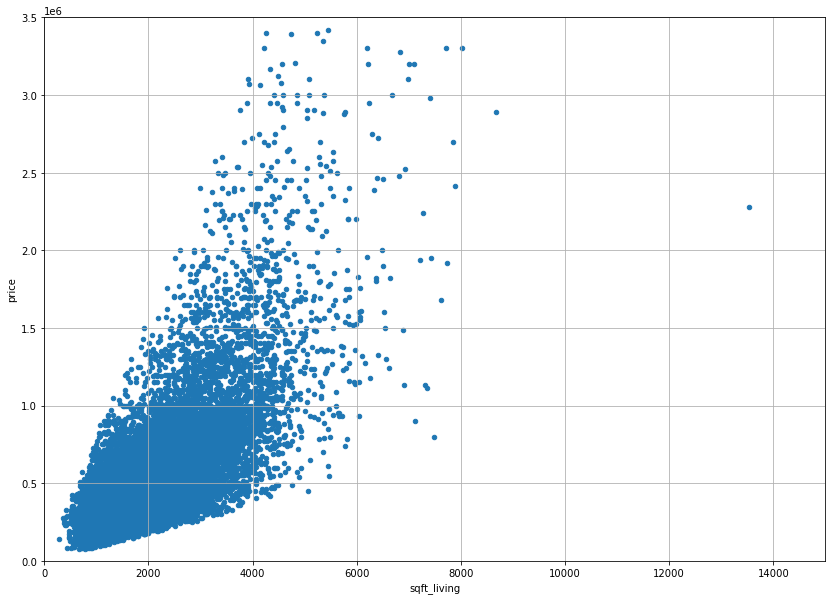

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()
sales.plot(x='sqft_living',y='price', kind='scatter',figsize=(14,10),grid=True, xlim=(0,15000),ylim=(0,3500000))
plt.show()

# Linear Model

## First Order Polynomial

In [7]:
from sklearn.linear_model import LinearRegression
x=poly1.iloc[:,:-1].values
y=poly1.iloc[:,1].values
Model1=LinearRegression()
Model1.fit(x,y)
coef=Model1.coef_
coef

array([280.6235679])

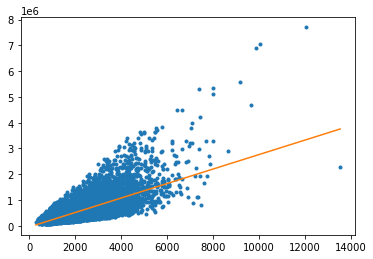

In [8]:
plt.plot(poly1['power_1'],poly1['price'],'.',
         poly1['power_1'],Model1.predict(x),'-')

## Second Order Polynomial

In [9]:
poly2=polynomial_DF(sales['sqft_living'],2)
feats=poly2.columns
poly2['price']=sales['price']
x=poly2[feats]
y=poly2['price']

In [11]:
Model2=LinearRegression()
Model2.fit(x,y)
coef=pd.DataFrame(Model2.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,67.994095
power_2,0.038581


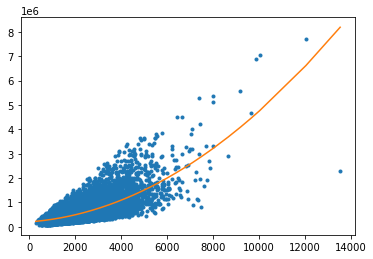

In [11]:
plt.plot(poly2['power_1'],poly2['price'],'.',
         poly2['power_1'],Model2.predict(x),'-')

## Third Order Polynomial

In [12]:
poly3=polynomial_DF(sales['sqft_living'],3)
feats=poly3.columns
poly3['price']=sales['price']
x=poly3[feats]
y=poly3['price']

In [13]:
Model3=LinearRegression()
Model3.fit(x,y)
coef=pd.DataFrame(Model3.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,-90.181986
power_2,0.087047
power_3,-0.000004


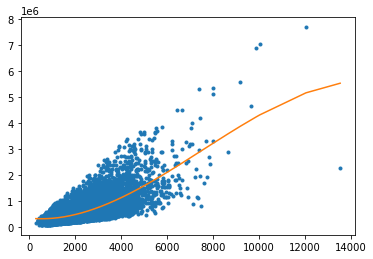

In [14]:
plt.plot(poly3['power_1'],poly3['price'],'.',
         poly3['power_1'],Model3.predict(x),'-')

## 15th Order Polynomial

In [15]:
poly15=polynomial_DF(sales['sqft_living'],15)
feats=poly15.columns
poly15['price']=sales['price']
x=poly15[feats]
y=poly15['price']

In [16]:
Model4=LinearRegression()
Model4.fit(x,y)
coef=pd.DataFrame(Model4.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,4.564042e-91
power_2,6.917121e-51
power_3,2.577326e-56
power_4,2.781979e-88
power_5,1.198639e-74
power_6,2.685755e-71
power_7,2.261476e-67
power_8,1.859003e-63
power_9,1.471441e-59
power_10,1.097710e-55


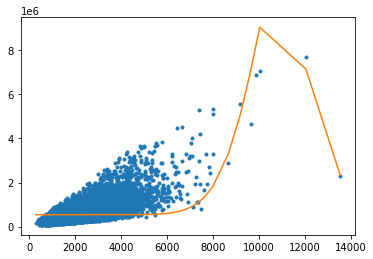

In [17]:
plt.plot(poly15['power_1'],poly15['price'],'.',
         poly15['power_1'],Model4.predict(x),'-')

# Using Other Data Sets

In [18]:
sales1=pd.read_csv('wk3_kc_house_set_1_data.csv',dtype=dtype_dict)
sales2=pd.read_csv('wk3_kc_house_set_2_data.csv',dtype=dtype_dict)
sales3=pd.read_csv('wk3_kc_house_set_3_data.csv',dtype=dtype_dict)
sales4=pd.read_csv('wk3_kc_house_set_4_data.csv',dtype=dtype_dict)

## Sales 1

In [19]:
poly15=polynomial_DF(sales1['sqft_living'],15)
feats=poly15.columns
poly15['price']=sales['price']
x=poly15[feats]
y=poly15['price']

In [20]:
Model5=LinearRegression()
Model5.fit(x,y)
coef=pd.DataFrame(Model5.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,-1.274739e-91
power_2,7.061428e-51
power_3,-9.834146e-57
power_4,-5.062072e-90
power_5,-1.346809e-75
power_6,-4.600419e-72
power_7,-3.492153e-68
power_8,-2.598767e-64
power_9,-1.872362e-60
power_10,-1.279511e-56


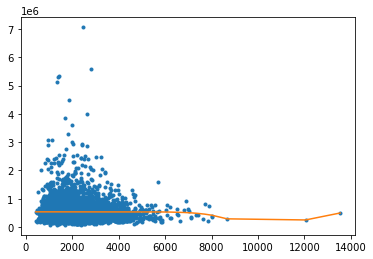

In [21]:
plt.plot(poly15['power_1'],poly15['price'],'.',
         poly15['power_1'],Model5.predict(x),'-')

## Sales 2

In [22]:
poly15=polynomial_DF(sales2['sqft_living'],15)
feats=poly15.columns
poly15['price']=sales['price']
x=poly15[feats]
y=poly15['price']

In [23]:
Model6=LinearRegression()
Model6.fit(x,y)
coef=pd.DataFrame(Model6.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,-9.796418e-79
power_2,-2.648410e-40
power_3,6.681206e-46
power_4,-5.025990e-51
power_5,-2.987112e-72
power_6,-5.485520e-60
power_7,-1.316184e-56
power_8,-5.430687e-53
power_9,-2.079669e-49
power_10,-7.068174e-46


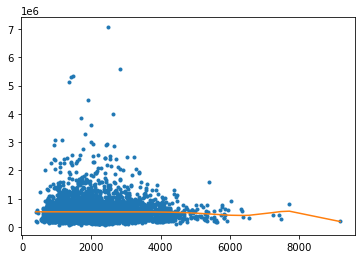

In [24]:
plt.plot(poly15['power_1'],poly15['price'],'.',
         poly15['power_1'],Model6.predict(x),'-')

## Sales 3

In [25]:
poly15=polynomial_DF(sales3['sqft_living'],15)
feats=poly15.columns
poly15['price']=sales['price']
x=poly15[feats]
y=poly15['price']

In [26]:
Model7=LinearRegression()
Model7.fit(x,y)
coef=pd.DataFrame(Model7.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,-1.529190e-89
power_2,4.204768e-50
power_3,7.478372e-57
power_4,-2.489206e-60
power_5,-8.470182e-74
power_6,-2.306002e-70
power_7,-1.444352e-66
power_8,-8.833477e-63
power_9,-5.208292e-59
power_10,-2.899619e-55


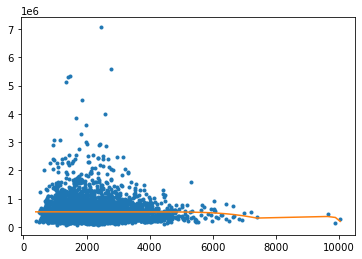

In [27]:
plt.plot(poly15['power_1'],poly15['price'],'.',
         poly15['power_1'],Model7.predict(x),'-')

## Sales 4

In [28]:
poly15=polynomial_DF(sales3['sqft_living'],15)
feats=poly15.columns
poly15['price']=sales['price']
x=poly15[feats]
y=poly15['price']

In [29]:
Model8=LinearRegression()
Model8.fit(x,y)
coef=pd.DataFrame(Model8.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,-1.529190e-89
power_2,4.204768e-50
power_3,7.478372e-57
power_4,-2.489206e-60
power_5,-8.470182e-74
power_6,-2.306002e-70
power_7,-1.444352e-66
power_8,-8.833477e-63
power_9,-5.208292e-59
power_10,-2.899619e-55


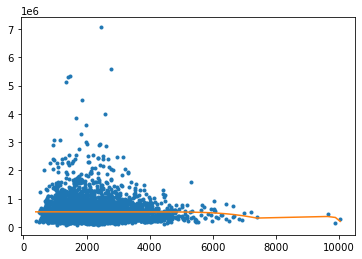

In [30]:
plt.plot(poly15['power_1'],poly15['price'],'.',
         poly15['power_1'],Model8.predict(x),'-')

# Cross Validation

## Import Given Training and Test Data Sets

In [31]:
Test_Set=pd.read_csv('wk3_kc_house_test_data.csv',dtype=dtype_dict)
Train_Set=pd.read_csv('wk3_kc_house_train_data.csv',dtype=dtype_dict)
Validation_Set=pd.read_csv('wk3_kc_house_valid_data.csv',dtype=dtype_dict)

## Polynomial Data Sets Using the Training Data

In [32]:
poly15=polynomial_DF(Train_Set['sqft_living'],15)
poly15

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
0,1960.0,3841600.0,7.529536e+09,1.475789e+13,2.892547e+16,5.669391e+19,1.111201e+23,2.177953e+26,4.268789e+29,8.366826e+32,1.639898e+36,3.214200e+39,6.299831e+42,1.234767e+46,2.420143e+49
1,5420.0,29376400.0,1.592201e+11,8.629729e+14,4.677313e+18,2.535104e+22,1.374026e+26,7.447222e+29,4.036394e+33,2.187726e+37,1.185747e+41,6.426750e+44,3.483299e+48,1.887948e+52,1.023268e+56
2,1160.0,1345600.0,1.560896e+09,1.810639e+12,2.100342e+15,2.436396e+18,2.826220e+21,3.278415e+24,3.802961e+27,4.411435e+30,5.117265e+33,5.936027e+36,6.885791e+39,7.987518e+42,9.265521e+45
3,1430.0,2044900.0,2.924207e+09,4.181616e+12,5.979711e+15,8.550987e+18,1.222791e+22,1.748591e+25,2.500485e+28,3.575694e+31,5.113243e+34,7.311937e+37,1.045607e+41,1.495218e+44,2.138162e+47
4,1370.0,1876900.0,2.571353e+09,3.522754e+12,4.826172e+15,6.611856e+18,9.058243e+21,1.240979e+25,1.700142e+28,2.329194e+31,3.190996e+34,4.371664e+37,5.989180e+40,8.205177e+43,1.124109e+47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,1490.0,2220100.0,3.307949e+09,4.928844e+12,7.343978e+15,1.094253e+19,1.630436e+22,2.429350e+25,3.619732e+28,5.393401e+31,8.036167e+34,1.197389e+38,1.784109e+41,2.658323e+44,3.960901e+47
9757,2520.0,6350400.0,1.600301e+10,4.032758e+13,1.016255e+17,2.560963e+20,6.453626e+23,1.626314e+27,4.098311e+30,1.032774e+34,2.602591e+37,6.558530e+40,1.652749e+44,4.164929e+47,1.049562e+51
9758,3510.0,12320100.0,4.324355e+10,1.517849e+14,5.327649e+17,1.870005e+21,6.563717e+24,2.303864e+28,8.086564e+31,2.838384e+35,9.962728e+38,3.496918e+42,1.227418e+46,4.308237e+49,1.512191e+53
9759,1020.0,1040400.0,1.061208e+09,1.082432e+12,1.104081e+15,1.126162e+18,1.148686e+21,1.171659e+24,1.195093e+27,1.218994e+30,1.243374e+33,1.268242e+36,1.293607e+39,1.319479e+42,1.345868e+45


In [33]:
poly14=poly15.iloc[:,:14]
poly13=poly15.iloc[:,:13]
poly12=poly15.iloc[:,:12]
poly11=poly15.iloc[:,:11]
poly10=poly15.iloc[:,:10]
poly9=poly15.iloc[:,:9]
poly8=poly15.iloc[:,:8]
poly7=poly15.iloc[:,:7]
poly6=poly15.iloc[:,:6]
poly5=poly15.iloc[:,:5]
poly4=poly15.iloc[:,:4]
poly3=poly15.iloc[:,:3]
poly2=poly15.iloc[:,:2]
poly1=poly15.iloc[:,:1]

## Polynomial Data Sets Using the Validation Data

In [34]:
Vpoly15=polynomial_DF(Validation_Set['sqft_living'],15)
Vpoly14=Vpoly15.iloc[:,:14]
Vpoly13=Vpoly15.iloc[:,:13]
Vpoly12=Vpoly15.iloc[:,:12]
Vpoly11=Vpoly15.iloc[:,:11]
Vpoly10=Vpoly15.iloc[:,:10]
Vpoly9=Vpoly15.iloc[:,:9]
Vpoly8=Vpoly15.iloc[:,:8]
Vpoly7=Vpoly15.iloc[:,:7]
Vpoly6=Vpoly15.iloc[:,:6]
Vpoly5=Vpoly15.iloc[:,:5]
Vpoly4=Vpoly15.iloc[:,:4]
Vpoly3=Vpoly15.iloc[:,:3]
Vpoly2=Vpoly15.iloc[:,:2]
Vpoly1=Vpoly15.iloc[:,:1]

## Models

### 1st Order

In [35]:
poly1['price']=Train_Set['price']
x=poly1.iloc[:,:-1].values
y=poly1.iloc[:,1].values
Model=LinearRegression()
Model.fit(x,y)
coef=Model1.coef_
print('Coefficient: '+str(coef))

Coefficient: [280.6235679]


<ipython-input-35-4529b8766b88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly1['price']=Train_Set['price']


In [36]:
RSS_List=[]
Vpoly1['price']=Validation_Set['price']
x=Vpoly1.iloc[:,:-1].values
y=Vpoly1.iloc[:,1].values
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 629097886299585.8


<ipython-input-36-2bd0bd4d6443>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vpoly1['price']=Validation_Set['price']


### 2nd Order

In [37]:
feats=poly2.columns
poly2['price']=Train_Set['price']
x=poly2[feats]
y=poly2['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model2.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,67.994095
power_2,0.038581


In [38]:
feats=Vpoly2.columns
Vpoly2['price']=Validation_Set['price']
x=Vpoly2[feats]
y=Vpoly2['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 623955062706518.1


### 3rd Order

In [39]:
feats=poly3.columns
poly3['price']=Train_Set['price']
x=poly3[feats]
y=poly3['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,7.502921e+00
power_2,5.030636e-02
power_3,1.670907e-07


In [40]:
feats=Vpoly3.columns
Vpoly3['price']=Validation_Set['price']
x=Vpoly3[feats]
y=Vpoly3['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 625820280251530.8


### 4th Order

In [41]:
feats=poly4.columns
poly4['price']=Train_Set['price']
x=poly4[feats]
y=poly4['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,-1.538527e+01
power_2,6.089709e-02
power_3,-1.614966e-06
power_4,9.117252e-11


In [42]:
feats=Vpoly4.columns
Vpoly4['price']=Validation_Set['price']
x=Vpoly4[feats]
y=Vpoly4['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 629987335647053.1


### 5th Order

In [43]:
feats=poly5.columns
poly5['price']=Train_Set['price']
x=poly5[feats]
y=poly5['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,3.198019e-05
power_2,5.445531e-02
power_3,-6.430073e-07
power_4,4.830002e-11
power_5,-2.303489e-16


In [44]:
feats=Vpoly5.columns
Vpoly5['price']=Validation_Set['price']
x=Vpoly5[feats]
y=Vpoly5['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 628238442032656.4


### 6th Order

In [45]:
feats=poly6.columns
poly6['price']=Train_Set['price']
x=poly6[feats]
y=poly6['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,8.500633e-12
power_2,1.432643e-08
power_3,3.794127e-05
power_4,-9.897942e-09
power_5,1.060747e-12
power_6,-3.908743e-17


In [46]:
feats=Vpoly6.columns
Vpoly6['price']=Validation_Set['price']
x=Vpoly6[feats]
y=Vpoly6['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 566268592707004.8


### 7th Order

In [47]:
feats=poly7.columns
poly7['price']=Train_Set['price']
x=poly7[feats]
y=poly7['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,8.802096e-19
power_2,1.067352e-12
power_3,8.652398e-12
power_4,1.402825e-08
power_5,-4.304799e-12
power_6,4.647962e-16
power_7,-1.674478e-20


In [48]:
feats=Vpoly7.columns
Vpoly7['price']=Validation_Set['price']
x=Vpoly7[feats]
y=Vpoly7['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 1073845511105917.1


### 8th Order

In [49]:
feats=poly8.columns
poly8['price']=Train_Set['price']
x=poly8[feats]
y=poly8['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,5.376768e-26
power_2,-5.008549e-15
power_3,7.202572e-19
power_4,2.174759e-15
power_5,3.747184e-12
power_6,-1.178195e-15
power_7,1.249868e-19
power_8,-4.383612e-24


In [50]:
feats=Vpoly8.columns
Vpoly8['price']=Validation_Set['price']
x=Vpoly8[feats]
y=Vpoly8['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 7087929449716431.0


### 9th Order

In [51]:
feats=poly9.columns
poly9['price']=Train_Set['price']
x=poly9[feats]
y=poly9['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,2.354408e-33
power_2,5.553250e-18
power_3,2.620954e-23
power_4,1.613515e-22
power_5,4.530064e-19
power_6,8.235231e-16
power_7,-2.585760e-19
power_8,2.699144e-23
power_9,-9.284855e-28


In [52]:
feats=Vpoly9.columns
Vpoly9['price']=Validation_Set['price']
x=Vpoly9[feats]
y=Vpoly9['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 4.530319412629969e+16


### 10th Order

In [53]:
feats=poly10.columns
poly10['price']=Train_Set['price']
x=poly10[feats]
y=poly10['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,8.101943e-41
power_2,1.718407e-21
power_3,7.503797e-27
power_4,8.376475e-30
power_5,2.829898e-26
power_6,8.325111e-23
power_7,1.580824e-19
power_8,-4.938712e-23
power_9,5.100073e-27
power_10,-1.733541e-31


In [54]:
feats=Vpoly10.columns
Vpoly10['price']=Validation_Set['price']
x=Vpoly10[feats]
y=Vpoly10['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 2.4755062713771638e+17


### 11th Order

In [55]:
feats=poly11.columns
poly11['price']=Train_Set['price']
x=poly11[feats]
y=poly11['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,2.320963e-48
power_2,2.393570e-25
power_3,-1.648216e-30
power_4,-9.330169e-35
power_5,1.228211e-33
power_6,4.564650e-30
power_7,1.396449e-26
power_8,2.744359e-23
power_9,-8.535311e-27
power_10,8.754003e-31


In [56]:
feats=Vpoly11.columns
Vpoly11['price']=Validation_Set['price']
x=Vpoly11[feats]
y=Vpoly11['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 1.1939091585420134e+18


### 12th Order

In [57]:
feats=poly12.columns
poly12['price']=Train_Set['price']
x=poly12[feats]
y=poly12['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,5.724777e-56
power_2,-5.431121e-28
power_3,1.908770e-34
power_4,-2.495934e-39
power_5,4.203541e-41
power_6,1.786355e-37
power_7,6.870608e-34
power_8,2.166753e-30
power_9,4.370854e-27
power_10,-1.354806e-30


In [58]:
feats=Vpoly12.columns
Vpoly12['price']=Validation_Set['price']
x=Vpoly12[feats]
y=Vpoly12['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 5.102199157109975e+18


### 13th Order

In [59]:
feats=poly13.columns
poly13['price']=Train_Set['price']
x=poly13[feats]
y=poly13['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,1.515038e-73
power_2,-5.397498e-42
power_3,2.856971e-47
power_4,-1.336382e-51
power_5,8.664781e-58
power_6,2.619820e-54
power_7,1.650742e-50
power_8,9.866505e-47
power_9,5.388931e-43
power_10,2.487903e-39


In [60]:
feats=Vpoly13.columns
Vpoly13['price']=Validation_Set['price']
x=Vpoly13[feats]
y=Vpoly13['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 7.616230021274707e+17


### 14th Order

In [61]:
feats=poly14.columns
poly14['price']=Train_Set['price']
x=poly14[feats]
y=poly14['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,2.350659e-81
power_2,8.246555e-46
power_3,-5.902762e-51
power_4,-3.262652e-55
power_5,1.650042e-65
power_6,4.760357e-62
power_7,3.149550e-58
power_8,2.013535e-54
power_9,1.218213e-50
power_10,6.721016e-47


In [62]:
feats=Vpoly14.columns
Vpoly14['price']=Validation_Set['price']
x=Vpoly14[feats]
y=Vpoly14['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 2.297560925113453e+18


### 15th Order

In [63]:
feats=poly15.columns
poly15['price']=Train_Set['price']
x=poly15[feats]
y=poly15['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
power_1,3.656497e-89
power_2,-3.490170e-49
power_3,-4.979006e-55
power_4,1.236316e-86
power_5,3.042936e-73
power_6,8.361826e-70
power_7,5.731335e-66
power_8,3.837865e-62
power_9,2.478850e-58
power_10,1.512697e-54


In [64]:
feats=Vpoly15.columns
Vpoly15['price']=Validation_Set['price']
x=Vpoly15[feats]
y=Vpoly15['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))

RSS: 6.955038097227613e+18


In [65]:
i=1
for rss in RSS_List:
    if rss<RSS:
        RSS=rss
        order=i
    i+=1

print("The Lower RSS is {} from the polynomial of Order {}".format(RSS,order))

The Lower RSS is 566268592707004.8 from the polynomial of Order 6


## Choosen Polynomial

In [66]:
Tpoly6=polynomial_DF(Test_Set['sqft_living'],6)
poly6=poly15.iloc[:,:6]

feats=poly6.columns
poly6['price']=Train_Set['price']
x=poly6[feats]
y=poly6['price']
Model=LinearRegression()
Model.fit(x,y)
coef=pd.DataFrame(Model.coef_,x.columns,columns=['Coefficient'])
coef

<ipython-input-66-be4eda59b4bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly6['price']=Train_Set['price']


,Coefficient
power_1,8.500633e-12
power_2,1.432643e-08
power_3,3.794127e-05
power_4,-9.897942e-09
power_5,1.060747e-12
power_6,-3.908743e-17


In [67]:
feats=Tpoly6.columns
Tpoly6['price']=Test_Set['price']
x=Tpoly6[feats]
y=Tpoly6['price']
RSS=((Model.predict(x)-y)**2).sum()
RSS_List.append(RSS)
print('RSS: {}'.format(RSS))


RSS: 135225114555012.02
